# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [20, 100, 250]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17546,4519,4602,1066,2259,2124
1,11594,7779,12144,3252,8035,3029
2,3191,1993,1799,1730,234,710


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The analysis for each wholesale customers is:

- **Sample 0**: The total purchase cost per category can be analysed as follows:
    - *Above Mean*: Fresh, Delicatessen
    - *Near Mean*: 
    - *Below Mean*: Milk, Grocery, Detergents_Paper
    - This sample could represent a **Restaurant**, because most of its spending is on Fresh and Deli products, which could represent a Gourmet type of restaurant.


- **Sample 1**: The total purchase cost per category can be analysed as follows:
    - *Above Mean*: Milk , Grocery, Detergents_Paper, Delicatessen
    - *Near Mean*: Fresh, Frozen
    - *Below Mean*: 
    - With no purchase costs below the mean for any of the product categories, and no specific trend in spending, this could represent a **Retail** store, a big market one, because of the spending above the mean for 4 categories.
    
    
- **Sample 2**: The total purchase cost per category can be analysed as follows:
    - *Above Mean*: 
    - *Near Mean*: 
    - *Below Mean*: Fresh, Delicatessen, Milk, Grocery, Detergents_Paper
    - With spedings for all categories below the mean, with higher spending on Fresh, Milk, Grocery and Frozen products, this could be a small, neighborhood **Market** type of customer. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# Imports needed for this implementation
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = pd.DataFrame.copy(data)
feature = 'Detergents_Paper'
new_data.drop([feature], axis = 1, inplace = True)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(new_data, data[feature], test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
display("Prediction score is {}".format(score))

'Prediction score is 0.728655181254'

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** Target feature to be predicted choosen was **Detergents_Paper**. The reported prediction score was **0.73**. This feature is highly correlated to other features of the customers spending habits, which means, it has low information gain to understand customer spending.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

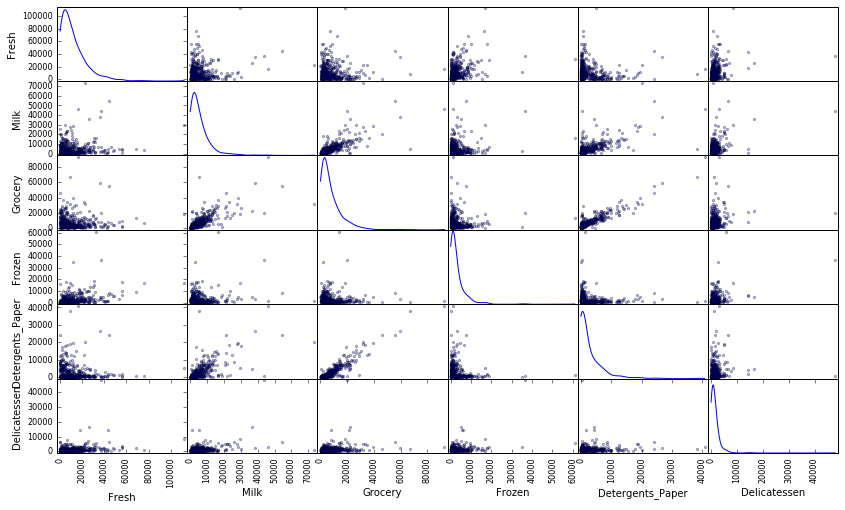

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** From a naked eye analysis, the following pairs of features seem to exhibit a high degree of correlation, with corresponding distributions:

- Detergents_Paper-Delicatessen: points seem to be distributed along the X axis, with lower variance in the Y axis.
- Detergents_Paper-Grocery: it seems to exist a linear dependance, where if one feature increases in its value, the other also increases by a certain factor
- Milk-Grocery: distribution seems to be a type of linear regression, with a few outliers
- Milk-Detergents_Paper: distribution seems to be a type of linear regression, with a few outliers
- Fresh-Delicatessen: points seem to be distributed along the X axis, with lower variance in the Y axis.

The feature I attempted to predict was Detergents_Paper, which does appear in 3 of the 5 pairs I identified, reflecting the high score calculated in Question 2.

The above analysis might be a bit skewed, because different features have different magnitudes of values and standard deviations. So, for a more precise analysis, normalization should be applied before hand.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

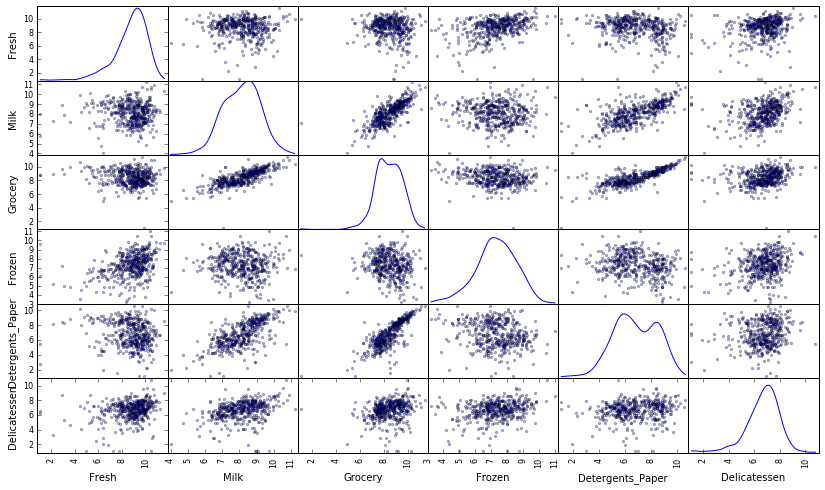

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(pd.DataFrame.copy(data))

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(pd.DataFrame.copy(samples))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.068090,7.597396,7.494986,7.455877,5.455321,6.565265


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
outliers  = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    #step = (Q3 - Q1) * 1.5
    
    #Using 3.0 to be more conservative to remove outliers, as recommended in the above link explaining Tukey method
    step = (Q3 - Q1) * 3.0 
    
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers += outlier.index.tolist()
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outlier)

# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(set(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Based on the definition above there are no outliers for more than one feature. The outliers determined above were removed from the dataset (added to the outliers list). Outliers can impact the clustering algorithms and also the feature transformation. For example, there can be a dimension with a maximum variance, that is solely caused by an outlier, not representing real maximum variance dimension. A more conservative version of Tukey's Method was applied to calculate these outliers (interquartile multiplier of 3.0 was used instead of 1.5), to remove only the most extreme outliers. A lower multiplier (more agressive) can remove outliers which are not really outliers, and alter the dataset structure.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

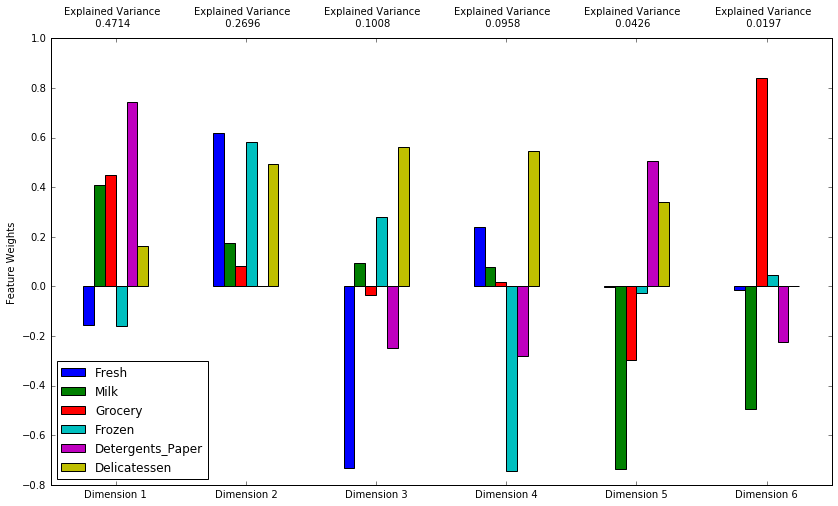

In [10]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** A total of 0.7410 of the variance in the data is explained by the first and second principal components. The first four principal components represent 0.9376 of the data's variance.

- **First Principle Component**: This component demonstrates that customers who spend in Detergents_Paper, Milk, Grocery and a bit less in Delicatessen, have reduced spending in Fresh and Frozen.


- **Second Principle Component**: This component shows that customers who spend more in Fresh, Frozen and Delicatessen, also spend less quantity in Milk and Grocery and have no influence in Detergents_Paper spending.


- **Third Principle Component**: In this dimension it is mapped customers who spend more in Delicatessen, Frozen and Milk, have expenses reduced greatly in Frozen, and slighlty less in Detergents_Paper and Grocery.


- **Fourth Principle Component**: This dimension represents customers who spend more in Delicatessen, Fresh, and to a lesser quantity, Milk and Grocery, tend to reduce speding greatly in Frozen and slightly Detergents_Paper.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8506,0.9247,-0.4693,0.7615,0.5728,-0.3888
1,2.3948,1.6691,0.0482,-0.2769,0.6165,-0.0695
2,-1.5838,-0.6147,0.8099,-0.0490,-0.0720,-0.2196


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2). fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8506,0.9247
1,2.3948,1.6691
2,-1.5838,-0.6147


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means advantages are mainly computational speed and scalibility. For large datasets, K-Means is a faster algorithm than Gaussian Mixture Model (GMM). In some extreme cases, GMM might be not be usable at all. K-Means disadvantage is that is a type of hard clustering, which means, that each point of the cluster, only belongs to that cluster.

GMM is a soft clustering method, which computes probability of each point to belong to each cluster. This provides richness in the results but at the cost of speed and scalability. For datasets with hundreds of thousands of points and, maybe dozens of clusters, computing probability of each individual point to belong to each cluster, is very intensive.

Taking into account that this dataset can be considered small (440 data points only), GMM will still be manageable to compute and provide more richness to clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

best_score = 0
best_n_components = 0

for i in range(2,13):
    clusterer_temp = GMM(n_components=i, random_state=0).fit(reduced_data)
    preds_temp = clusterer_temp.predict(reduced_data)
    score_temp = silhouette_score(reduced_data, preds_temp, random_state=0)
    print "For Number of Cluster {} the score is {}".format(i, score_temp)
    if score_temp > best_score:
        best_score = score_temp
        best_n_components = i
    
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=best_n_components, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=0)
print "\n Best Score is {} for {} Clusters".format(score, best_n_components)

For Number of Cluster 2 the score is 0.414233533666
For Number of Cluster 3 the score is 0.386339876235
For Number of Cluster 4 the score is 0.344723700473
For Number of Cluster 5 the score is 0.233950621419
For Number of Cluster 6 the score is 0.274078705852
For Number of Cluster 7 the score is 0.305109943427
For Number of Cluster 8 the score is 0.225095043972
For Number of Cluster 9 the score is 0.316002660823
For Number of Cluster 10 the score is 0.323435334421
For Number of Cluster 11 the score is 0.279035792327
For Number of Cluster 12 the score is 0.291766737601

 Best Score is 0.414233533666 for 2 Clusters


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The number of cluster tried were from 2 clusters to 12. The **best score of 0.414** was obtained with **2 clusters**.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

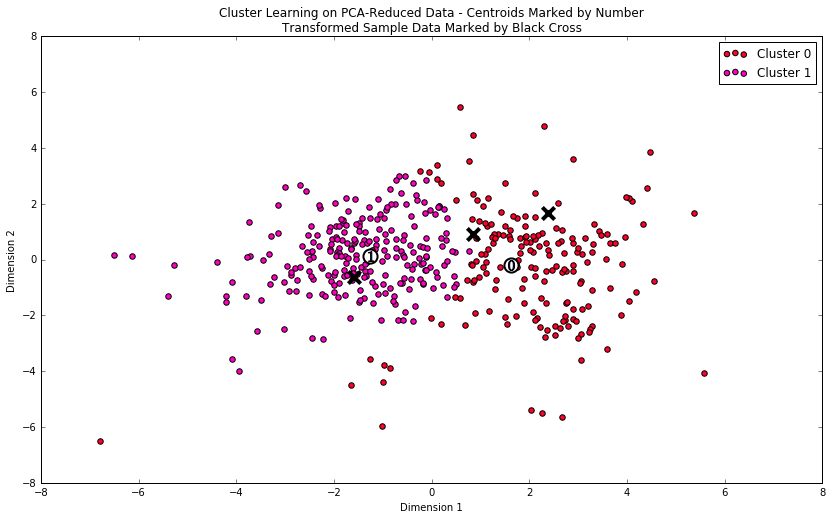

In [20]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4618.0,6343.0,9488.0,1030.0,3041.0,987.0
Segment 1,8813.0,2055.0,2685.0,1973.0,356.0,725.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** The analysis for each cluster is as follows:

- **Cluster 0**: Below can be depicted if the center of this cluster's total purchase costs are below or above each respective categories' mean:
    - *Below the mean*: Fresh, Frozen, Delicatessen
    - *Above the mean*: Milk, Grocery, Detergents_Paper
    
The customers that belong to this cluster are most likely **Big Markets and Retail stores**, because of the above average spending in Milk, Grocery and Detergents_Paper, which indicates high volume of these type of products are transactioned.
    



- **Cluster 1**: Below can be depicted if the center of this cluster's total purchase costs are below or above each respective categories' mean:
    - *Below the mean*: Fresh, Milk, Grocey, Frozen, Detergents_Paper, Delicatessen
    - *Above the mean*: none
    
I think this cluster can represent **Restaurants and Cafes, and maybe, some local Markets** with a focus on fresh food, because all the values are below the average of each category, which is indicative of low volumen, but, the highest expenditure is on Fresh products.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** Sample points 0 and 1 are predicted to belong to Cluster 0 (Big Markets and Retail). Sample point 2 is predicted to belong to Cluster 1 (Restaurants, Cafes, Small Market).

The predictions I made for each sample point in Question 1 are:

- Sample Point 0, Restaurant, which is not the same estimation I made for Cluster 0, unless it's a big Restaurant chain.
- Sample Point 1, Retail, which is coherent with the estimation I also made for Cluster 0.
- Sample Point 2, Small Market, is also coherent with the estimation I made for Cluster 1.

So I can say I guessed 66.7% of the sample points, correctly, using naked eye.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Assuming the findings above are close to the reality, we can say that not all customers will be equally affected. For example, for Big Retails, that have a high daily volume of sales, 3 days a week might not be sufficient for their needs. On the other hand, some local market or restaurant with some storage capability, can receive only for 3 days a week.

So an analysis on the needs of each Cluster's mean customer would be the proper way to decide how to run A/B tests on these customers. For example, it can be concluded that for Cluster 0, 3 times a week on average is best, and for Cluster 1, 5 days a week is better.

The A/B tests could run as follows:

For each Cluster, it would be sampled 20 clients. Than, for these 20 clients, we would change the delivery system to '3 day a week'. For Cluster 0, which we think are Retailers, we would test the hypothesis '3 days a week' would result in a negative answer. Meaning, we believe for Cluster 0, they prefer 5 days a week. In the cases the response is positive, we could further learn why these customer prefer 5 days a week. This could be done by using the A/B test results to feed a supervised learner (as the target variable), where the customer segment would also be a feature. 

The same would be done for Cluster 1, but for these, we believe 3 days a week would generate positive feedback. If negative feedback happened, we could apply the same procedures to feed a supervised learner to the learn more about these customers.

Afterwards, we could use the supervised learner, to predict more sampled customers, for example, another 20 customers, and retest the delivery system, to verify the hypothesis of the supervised learner hold true. It can be considered like a second pass or run of the A/B test.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** There are several approaches the wholesale distributor can have. 

One is to study each customer segment found by unsupervised learning (using A/B tests) and conclude what is the best delivery model for that segment, i.e., generalizing for each customer segment, the best delivery model. In this case, the customer segment feature would be the target variable to be learned by the supervised learner.

The other approach would be to use the results of the A/B tests as another new feature (e.g.: with values, 0- 3x week; 1- 5x week) and use that as the target variable. This way, if the number of A/B tests is relevant (sample points), the customer segment could be a decisive feature for the supervised learner, used together with the original features. For example, a Restaurant with high spending in Fresh, might want 5x week deliveries, and a Market with lower Fresh spending but higher Frozen spending, might need only 3x week deliveries.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

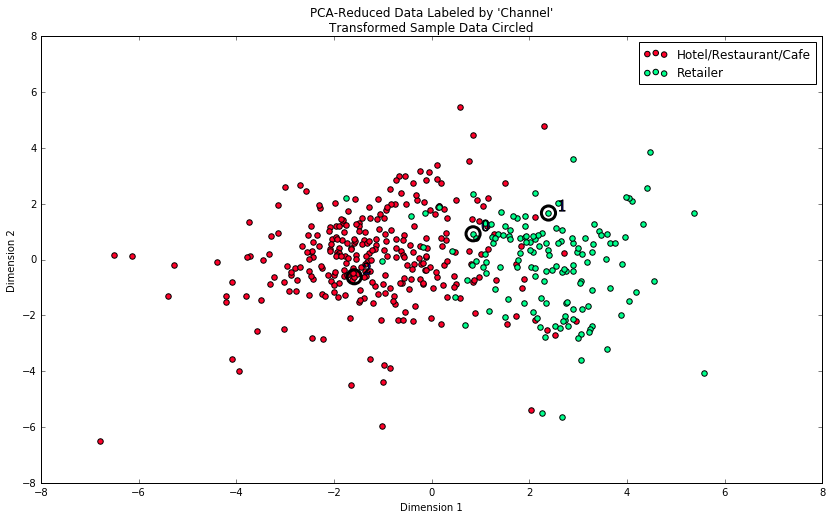

In [23]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm seems to behave rather well. The clusters seem a good fit of the Channel feature. The separation of the categories happens around the same value, an imaginary vertical line with a constant value for Dimension 1 of around 0.75 or so. The diferences is that Cluster 0 had more data points at the left side of this imaginary line, and what happens here is the opposite, there are more points of Restaurants (Cluster 1), to the right of the line. 

These classifications seem rather coherent with my prediction, which was for Cluster 0, Big Markets and Retail stores, and for Cluster 1, Restaurants and Cafes, and maybe, some local Markets. 
So, in fact, these points I mention above (which are left or right of this vertical line), might be these corner cases, where there are Restaurants with big spending, similar to Retailers, and small Retailers with smaller spending, similar to Restaurants.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.